In [10]:
import serial
import serial.tools.list_ports
import tkinter as tk
import tkinter.ttk as ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tqdm import tqdm, gui as tqdm_gui
from threading import Thread


In [11]:
# Serial communication settings
SERIAL_PORT = 'COM10'  # Replace with the appropriate serial port
BAUD_RATE = 115200

# Create a serial connection
ser = serial.Serial(SERIAL_PORT, BAUD_RATE)

In [12]:
# Function to handle button click
def button_click():
    # Initialize lists to store the received values
    x_values = []
    y_values = []
    z_values = []
    # Read and store the 100 values from Arduino
    count = 0
    # Send letter 'A' to Arduino
    ser.write(b'A')
    # Read and store the 100 values from Arduino
    with tqdm(total=100, desc="Lendo MPU6050") as pbar:
        while count < 100:
            line = ser.readline().decode().strip()
            print("Leitura: ", line)

            #if line.startswith("X:") and line.find("Y:") != -1 and line.find("Z:") != -1:
            if line.startswith("X:"):
                print("Lendo linha: ", count)
                values = line.split()
                x = float(values[0][2:])
                y = float(values[1][2:])
                z = float(values[2][2:])
                x_values.append(x)
                y_values.append(y)
                z_values.append(z)
                count += 1
                # Update progress in the GUI
                pbar.update(1)
    
    # # Start a new thread to read values and update progress
    # thread = Thread(target=read_values)
    # thread.start()        
    
    # Clear the existing plot and text box, if any
    clear_interface()
 
    # Plot the values
    fig = plt.figure()
    plt.plot(x_values, label='X')
    plt.plot(y_values, label='Y')
    plt.plot(z_values, label='Z')
    plt.title('Aceleração MPU6050')
    plt.legend()
    plt.xlabel('Amostragem')
    plt.ylabel('Aceleração (m/s²)')
    # plt.show()

    # Create a Tkinter canvas
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

     # Create a text box to display the values
    text_box = tk.Text(window, height=10, width=30)
    text_box.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)
    for i in range(len(x_values)):
        text_box.insert(tk.END, f"{i+1}: X: {x_values[i]}, Y: {y_values[i]}, Z: {z_values[i]}\n")

def update_progress(current_value):
    pbar["value"] = current_value
    window.update_idletasks()

def clear_interface():
    # Clear the plot and text box by destroying the existing canvas and text widget
    for widget in window.winfo_children():
        if isinstance(widget, (tk.Canvas, tk.Text)):
            widget.destroy()

In [13]:
# Function to handle button click
def button_click():
    # Initialize lists to store the received values
    x_values = []
    y_values = []
    z_values = []
    # Read and store the 100 values from Arduino
    count = 0
    # Send letter 'A' to Arduino
    ser.write(b'A')
    # Read and store the 100 values from Arduino
    with tqdm(total=100, desc="Lendo MPU6050") as pbar:
        while count < 100:
            line = ser.readline().decode().strip()
            print("Leitura: ", line)

            #if line.startswith("X:") and line.find("Y:") != -1 and line.find("Z:") != -1:
            if line.startswith("X:"):
                print("Lendo linha: ", count)
                values = line.split()
                x = float(values[0][2:])
                y = float(values[1][2:])
                z = float(values[2][2:])
                x_values.append(x)
                y_values.append(y)
                z_values.append(z)
                count += 1
                # Update progress in the GUI
                pbar.update(1)
    
    # # Start a new thread to read values and update progress
    # thread = Thread(target=read_values)
    # thread.start()        
    
    # Clear the existing plot and text box, if any
    clear_interface()
 
    # Create a figure and subplots for each axis
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

    # Plot x-axis values
    ax1.plot(range(1, len(x_values) + 1), x_values, marker='o', markersize=5)
    ax1.set_title('X-Axis')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Acceleration')

    # Plot y-axis values
    ax2.plot(range(1, len(y_values) + 1), y_values, marker='o', markersize=5)
    ax2.set_title('Y-Axis')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Acceleration')

    # Plot z-axis values
    ax3.plot(range(1, len(z_values) + 1), z_values, marker='o', markersize=5)
    ax3.set_title('Z-Axis')
    ax3.set_xlabel('Index')
    ax3.set_ylabel('Acceleration')

    #plot in the terminal the average for each axis
    print("Average X: ", sum(x_values)/len(x_values))
    print("Average Y: ", sum(y_values)/len(y_values))
    print("Average Z: ", sum(z_values)/len(z_values))

    # Create a Tkinter canvas
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

     # Create a text box to display the values
    text_box = tk.Text(window, height=10, width=30)
    text_box.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)
    for i in range(len(x_values)):
        text_box.insert(tk.END, f"{i+1}: X: {x_values[i]}, Y: {y_values[i]}, Z: {z_values[i]}\n")

def update_progress(current_value):
    pbar["value"] = current_value
    window.update_idletasks()

def clear_interface():
    # Clear the plot and text box by destroying the existing canvas and text widget
    for widget in window.winfo_children():
        if isinstance(widget, (tk.Canvas, tk.Text)):
            widget.destroy()

Lendo MPU6050:   3%|▎         | 3/100 [00:00<00:03, 27.37it/s]

Leitura:  Adafruit MPU6050 test!
Leitura:  MPU6050 Found!
Leitura:  Accelerometer range set to: +-2G
Leitura:  Gyro range set to: +- 500 deg/s
Leitura:  Filter bandwidth set to: 21 Hz
Leitura:  
Leitura:  X:-0.47 Y:-9.82 Z:3.39
Lendo linha:  0
Leitura:  X:-0.48 Y:-9.83 Z:3.39
Lendo linha:  1
Leitura:  X:-0.46 Y:-9.83 Z:3.43
Lendo linha:  2
Leitura:  X:-0.47 Y:-9.82 Z:3.39
Lendo linha:  3


Lendo MPU6050:   6%|▌         | 6/100 [00:00<00:04, 21.26it/s]

Leitura:  X:-0.48 Y:-9.82 Z:3.38
Lendo linha:  4
Leitura:  X:-0.39 Y:-9.80 Z:3.43
Lendo linha:  5
Leitura:  X:-0.50 Y:-9.84 Z:3.51
Lendo linha:  6
Leitura:  X:-0.42 Y:-9.79 Z:3.39
Lendo linha:  7


Lendo MPU6050:  12%|█▏        | 12/100 [00:00<00:04, 19.25it/s]

Leitura:  X:-0.47 Y:-9.82 Z:3.39
Lendo linha:  8
Leitura:  X:-0.50 Y:-9.83 Z:3.36
Lendo linha:  9
Leitura:  X:-0.44 Y:-9.79 Z:3.40
Lendo linha:  10
Leitura:  X:-0.50 Y:-9.87 Z:3.39
Lendo linha:  11


Lendo MPU6050:  16%|█▌        | 16/100 [00:00<00:04, 18.88it/s]

Leitura:  X:-0.54 Y:-9.83 Z:3.37
Lendo linha:  12
Leitura:  X:-0.46 Y:-9.81 Z:3.43
Lendo linha:  13
Leitura:  X:-0.43 Y:-9.82 Z:3.44
Lendo linha:  14
Leitura:  X:-0.52 Y:-9.85 Z:3.30
Lendo linha:  15


Lendo MPU6050:  20%|██        | 20/100 [00:01<00:04, 18.67it/s]

Leitura:  X:-0.38 Y:-9.78 Z:3.44
Lendo linha:  16
Leitura:  X:-0.49 Y:-9.83 Z:3.39
Lendo linha:  17
Leitura:  X:-0.48 Y:-9.83 Z:3.33
Lendo linha:  18
Leitura:  X:-0.47 Y:-9.81 Z:3.41
Lendo linha:  19


Lendo MPU6050:  24%|██▍       | 24/100 [00:01<00:04, 18.51it/s]

Leitura:  X:-0.49 Y:-9.83 Z:3.42
Lendo linha:  20
Leitura:  X:-0.47 Y:-9.85 Z:3.37
Lendo linha:  21
Leitura:  X:-0.48 Y:-9.84 Z:3.40
Lendo linha:  22
Leitura:  X:-0.46 Y:-9.83 Z:3.41
Lendo linha:  23


Lendo MPU6050:  28%|██▊       | 28/100 [00:01<00:03, 18.45it/s]

Leitura:  X:-0.49 Y:-9.84 Z:3.35
Lendo linha:  24
Leitura:  X:-0.42 Y:-9.80 Z:3.44
Lendo linha:  25
Leitura:  X:-0.47 Y:-9.83 Z:3.37
Lendo linha:  26
Leitura:  X:-0.46 Y:-9.82 Z:3.38
Lendo linha:  27


Lendo MPU6050:  32%|███▏      | 32/100 [00:01<00:03, 18.43it/s]

Leitura:  X:-0.45 Y:-9.82 Z:3.43
Lendo linha:  28
Leitura:  X:-0.51 Y:-9.89 Z:3.38
Lendo linha:  29
Leitura:  X:-0.45 Y:-9.80 Z:3.35
Lendo linha:  30
Leitura:  X:-0.41 Y:-9.81 Z:3.45
Lendo linha:  31


Lendo MPU6050:  36%|███▌      | 36/100 [00:01<00:03, 18.38it/s]

Leitura:  X:-0.50 Y:-9.84 Z:3.41
Lendo linha:  32
Leitura:  X:-0.37 Y:-9.82 Z:3.40
Lendo linha:  33
Leitura:  X:-0.50 Y:-9.82 Z:3.47
Lendo linha:  34
Leitura:  X:-0.47 Y:-9.81 Z:3.48
Lendo linha:  35
Leitura:  X:-0.46 Y:-9.83 Z:3.44
Lendo linha:  36


Lendo MPU6050:  42%|████▏     | 42/100 [00:02<00:03, 18.50it/s]

Leitura:  X:-0.37 Y:-9.76 Z:3.42
Lendo linha:  37
Leitura:  X:-0.65 Y:-9.93 Z:3.36
Lendo linha:  38
Leitura:  X:-0.36 Y:-9.79 Z:3.44
Lendo linha:  39
Leitura:  X:-0.54 Y:-9.80 Z:3.41
Lendo linha:  40
Leitura:  X:-0.48 Y:-9.83 Z:3.35
Lendo linha:  41


Lendo MPU6050:  46%|████▌     | 46/100 [00:02<00:02, 18.49it/s]

Leitura:  X:-0.14 Y:-9.71 Z:3.52
Lendo linha:  42
Leitura:  X:-0.62 Y:-9.91 Z:3.26
Lendo linha:  43
Leitura:  X:-0.47 Y:-9.84 Z:3.45
Lendo linha:  44
Leitura:  X:-0.44 Y:-9.79 Z:3.39
Lendo linha:  45
Leitura:  X:-0.51 Y:-9.83 Z:3.36
Lendo linha:  46


Lendo MPU6050:  50%|█████     | 50/100 [00:02<00:02, 18.43it/s]

Leitura:  X:-0.44 Y:-9.83 Z:3.39
Lendo linha:  47
Leitura:  X:-0.47 Y:-9.83 Z:3.41
Lendo linha:  48
Leitura:  X:-0.48 Y:-9.83 Z:3.40
Lendo linha:  49
Leitura:  X:-0.45 Y:-9.79 Z:3.41
Lendo linha:  50
Leitura:  X:-0.45 Y:-9.81 Z:3.42
Lendo linha:  51


Lendo MPU6050:  56%|█████▌    | 56/100 [00:02<00:02, 18.45it/s]

Leitura:  X:-0.52 Y:-9.84 Z:3.38
Lendo linha:  52
Leitura:  X:-0.46 Y:-9.82 Z:3.36
Lendo linha:  53
Leitura:  X:-0.46 Y:-9.84 Z:3.42
Lendo linha:  54
Leitura:  X:-0.48 Y:-9.83 Z:3.38
Lendo linha:  55


Lendo MPU6050:  60%|██████    | 60/100 [00:03<00:02, 18.48it/s]

Leitura:  X:-0.45 Y:-9.82 Z:3.43
Lendo linha:  56
Leitura:  X:-0.47 Y:-9.82 Z:3.36
Lendo linha:  57
Leitura:  X:-0.49 Y:-9.81 Z:3.42
Lendo linha:  58
Leitura:  X:-0.43 Y:-9.82 Z:3.43
Lendo linha:  59


Lendo MPU6050:  64%|██████▍   | 64/100 [00:03<00:01, 18.42it/s]

Leitura:  X:-0.51 Y:-9.82 Z:3.42
Lendo linha:  60
Leitura:  X:-0.47 Y:-9.81 Z:3.40
Lendo linha:  61
Leitura:  X:-0.46 Y:-9.84 Z:3.41
Lendo linha:  62
Leitura:  X:-0.45 Y:-9.81 Z:3.37
Lendo linha:  63


Lendo MPU6050:  68%|██████▊   | 68/100 [00:03<00:01, 18.41it/s]

Leitura:  X:-0.46 Y:-9.82 Z:3.38
Lendo linha:  64
Leitura:  X:-0.53 Y:-9.90 Z:3.45
Lendo linha:  65
Leitura:  X:-0.40 Y:-9.84 Z:3.47
Lendo linha:  66
Leitura:  X:-0.46 Y:-9.79 Z:3.41
Lendo linha:  67


Lendo MPU6050:  72%|███████▏  | 72/100 [00:03<00:01, 18.41it/s]

Leitura:  X:-0.52 Y:-9.84 Z:3.37
Lendo linha:  68
Leitura:  X:-0.40 Y:-9.79 Z:3.41
Lendo linha:  69
Leitura:  X:-0.49 Y:-9.83 Z:3.41
Lendo linha:  70
Leitura:  X:-0.48 Y:-9.84 Z:3.42
Lendo linha:  71
Leitura:  X:-0.45 Y:-9.82 Z:3.36
Lendo linha:  72


Lendo MPU6050:  76%|███████▌  | 76/100 [00:04<00:01, 18.51it/s]

Leitura:  X:-0.46 Y:-9.81 Z:3.44
Lendo linha:  73
Leitura:  X:-0.46 Y:-9.82 Z:3.38
Lendo linha:  74
Leitura:  X:-0.53 Y:-9.83 Z:3.36
Lendo linha:  75
Leitura:  X:-0.41 Y:-9.77 Z:3.39
Lendo linha:  76


Lendo MPU6050:  80%|████████  | 80/100 [00:04<00:01, 18.50it/s]

Leitura:  X:-0.50 Y:-9.86 Z:3.36
Lendo linha:  77
Leitura:  X:-0.45 Y:-9.81 Z:3.38
Lendo linha:  78
Leitura:  X:-0.45 Y:-9.82 Z:3.43
Lendo linha:  79
Leitura:  X:-0.49 Y:-9.83 Z:3.40
Lendo linha:  80


Lendo MPU6050:  84%|████████▍ | 84/100 [00:04<00:00, 18.55it/s]

Leitura:  X:-0.46 Y:-9.83 Z:3.38
Lendo linha:  81
Leitura:  X:-0.46 Y:-9.80 Z:3.42
Lendo linha:  82
Leitura:  X:-0.49 Y:-9.83 Z:3.39
Lendo linha:  83
Leitura:  X:-0.45 Y:-9.80 Z:3.37
Lendo linha:  84


Lendo MPU6050:  88%|████████▊ | 88/100 [00:04<00:00, 18.49it/s]

Leitura:  X:-0.40 Y:-9.81 Z:3.41
Lendo linha:  85
Leitura:  X:-0.53 Y:-9.84 Z:3.41
Lendo linha:  86
Leitura:  X:-0.50 Y:-9.84 Z:3.40
Lendo linha:  87
Leitura:  X:-0.48 Y:-9.81 Z:3.47
Lendo linha:  88


Lendo MPU6050:  92%|█████████▏| 92/100 [00:04<00:00, 18.45it/s]

Leitura:  X:-0.44 Y:-9.81 Z:3.38
Lendo linha:  89
Leitura:  X:-0.54 Y:-9.89 Z:3.35
Lendo linha:  90
Leitura:  X:-0.41 Y:-9.79 Z:3.42
Lendo linha:  91
Leitura:  X:-0.49 Y:-9.81 Z:3.34
Lendo linha:  92


Lendo MPU6050:  96%|█████████▌| 96/100 [00:05<00:00, 18.58it/s]

Leitura:  X:-0.50 Y:-9.85 Z:3.41
Lendo linha:  93
Leitura:  X:-0.48 Y:-9.82 Z:3.39
Lendo linha:  94
Leitura:  X:-0.45 Y:-9.82 Z:3.41
Lendo linha:  95
Leitura:  X:-0.45 Y:-9.83 Z:3.41
Lendo linha:  96


Lendo MPU6050: 100%|██████████| 100/100 [00:05<00:00, 18.61it/s]

Leitura:  X:-0.48 Y:-9.82 Z:3.40
Lendo linha:  97
Leitura:  X:-0.45 Y:-9.82 Z:3.38
Lendo linha:  98
Leitura:  X:-0.45 Y:-9.82 Z:3.40
Lendo linha:  99


Average X:  -0.4658000000000001
Average Y:  -9.823200000000005
Average Z:  3.4003999999999994


Lendo MPU6050:  16%|█▌        | 16/100 [00:00<00:00, 132.36it/s]

Leitura:  X:-0.49 Y:-9.84 Z:3.38
Lendo linha:  0
Leitura:  X:-0.44 Y:-9.81 Z:3.41
Lendo linha:  1
Leitura:  X:-0.48 Y:-9.88 Z:3.42
Lendo linha:  2
Leitura:  X:-0.44 Y:-9.80 Z:3.37
Lendo linha:  3
Leitura:  X:-0.50 Y:-9.84 Z:3.46
Lendo linha:  4
Leitura:  X:-0.47 Y:-9.84 Z:3.38
Lendo linha:  5
Leitura:  X:-0.48 Y:-9.81 Z:3.38
Lendo linha:  6
Leitura:  X:-0.47 Y:-9.82 Z:3.42
Lendo linha:  7
Leitura:  X:-0.49 Y:-9.85 Z:3.38
Lendo linha:  8
Leitura:  X:-0.41 Y:-9.80 Z:3.38
Lendo linha:  9
Leitura:  X:-0.48 Y:-9.82 Z:3.41
Lendo linha:  10
Leitura:  X:-0.52 Y:-9.84 Z:3.38
Lendo linha:  11
Leitura:  X:-0.47 Y:-9.83 Z:3.39
Lendo linha:  12
Leitura:  X:-0.48 Y:-9.82 Z:3.40
Lendo linha:  13
Leitura:  X:-0.45 Y:-9.82 Z:3.36
Lendo linha:  14
Leitura:  X:-0.49 Y:-9.85 Z:3.42
Lendo linha:  15
Leitura:  X:-0.43 Y:-9.83 Z:3.46
Lendo linha:  16
Leitura:  X:-0.48 Y:-9.85 Z:3.44
Lendo linha:  17
Leitura:  X:-0.48 Y:-9.77 Z:3.24
Lendo linha:  18
Leitura:  X:-0.43 Y:-9.85 Z:3.43
Lendo linha:  19
Leitura:  

Lendo MPU6050:  30%|███       | 30/100 [00:00<00:02, 29.84it/s] 

Leitura:  X:-0.45 Y:-9.81 Z:3.38
Lendo linha:  29
Leitura:  X:-0.44 Y:-9.81 Z:3.38
Lendo linha:  30
Leitura:  X:-0.54 Y:-9.88 Z:3.37
Lendo linha:  31
Leitura:  X:-0.46 Y:-9.79 Z:3.40
Lendo linha:  32


Lendo MPU6050:  37%|███▋      | 37/100 [00:01<00:02, 25.39it/s]

Leitura:  X:-0.48 Y:-9.81 Z:3.38
Lendo linha:  33
Leitura:  X:-0.46 Y:-9.83 Z:3.40
Lendo linha:  34
Leitura:  X:-0.50 Y:-9.82 Z:3.39
Lendo linha:  35
Leitura:  X:-0.46 Y:-9.83 Z:3.36
Lendo linha:  36
Leitura:  X:-0.47 Y:-9.79 Z:3.39
Lendo linha:  37
Leitura:  X:-0.51 Y:-9.83 Z:3.35
Lendo linha:  38
Leitura:  X:-0.45 Y:-9.80 Z:3.39
Lendo linha:  39
Leitura:  X:-0.51 Y:-9.83 Z:3.39
Lendo linha:  40


Lendo MPU6050:  42%|████▏     | 42/100 [00:01<00:02, 23.38it/s]

Leitura:  X:-0.46 Y:-9.81 Z:3.42
Lendo linha:  41
Leitura:  X:-0.48 Y:-9.84 Z:3.38
Lendo linha:  42
Leitura:  X:-0.47 Y:-9.82 Z:3.40
Lendo linha:  43
Leitura:  X:-0.49 Y:-9.83 Z:3.38
Lendo linha:  44


Lendo MPU6050:  49%|████▉     | 49/100 [00:01<00:02, 21.40it/s]

Leitura:  X:-0.48 Y:-9.81 Z:3.39
Lendo linha:  45
Leitura:  X:-0.51 Y:-9.84 Z:3.34
Lendo linha:  46
Leitura:  X:-0.47 Y:-9.82 Z:3.39
Lendo linha:  47
Leitura:  X:-0.48 Y:-9.82 Z:3.37
Lendo linha:  48


Lendo MPU6050:  52%|█████▏    | 52/100 [00:02<00:02, 20.72it/s]

Leitura:  X:-0.49 Y:-9.83 Z:3.41
Lendo linha:  49
Leitura:  X:-0.48 Y:-9.82 Z:3.36
Lendo linha:  50
Leitura:  X:-0.47 Y:-9.80 Z:3.39
Lendo linha:  51
Leitura:  X:-0.49 Y:-9.81 Z:3.38
Lendo linha:  52


Lendo MPU6050:  55%|█████▌    | 55/100 [00:02<00:02, 20.13it/s]

Leitura:  X:-0.47 Y:-9.80 Z:3.37
Lendo linha:  53
Leitura:  X:-0.52 Y:-9.86 Z:3.35
Lendo linha:  54
Leitura:  X:-0.45 Y:-9.78 Z:3.42
Lendo linha:  55
Leitura:  X:-0.43 Y:-9.81 Z:3.43
Lendo linha:  56


Lendo MPU6050:  61%|██████    | 61/100 [00:02<00:02, 19.33it/s]

Leitura:  X:-0.55 Y:-9.85 Z:3.29
Lendo linha:  57
Leitura:  X:-0.43 Y:-9.80 Z:3.46
Lendo linha:  58
Leitura:  X:-0.53 Y:-9.80 Z:3.31
Lendo linha:  59
Leitura:  X:-0.45 Y:-9.82 Z:3.41
Lendo linha:  60


Lendo MPU6050:  65%|██████▌   | 65/100 [00:02<00:01, 18.97it/s]

Leitura:  X:-0.47 Y:-9.83 Z:3.42
Lendo linha:  61
Leitura:  X:-0.50 Y:-9.82 Z:3.36
Lendo linha:  62
Leitura:  X:-0.47 Y:-9.82 Z:3.37
Lendo linha:  63
Leitura:  X:-0.48 Y:-9.85 Z:3.42
Lendo linha:  64
Leitura:  X:-0.53 Y:-9.80 Z:3.32
Lendo linha:  65


Lendo MPU6050:  69%|██████▉   | 69/100 [00:02<00:01, 18.77it/s]

Leitura:  X:-0.39 Y:-9.79 Z:3.41
Lendo linha:  66
Leitura:  X:-0.51 Y:-9.83 Z:3.36
Lendo linha:  67
Leitura:  X:-0.49 Y:-9.80 Z:3.36
Lendo linha:  68
Leitura:  X:-0.42 Y:-9.80 Z:3.41
Lendo linha:  69


Lendo MPU6050:  73%|███████▎  | 73/100 [00:03<00:01, 18.64it/s]

Leitura:  X:-0.53 Y:-9.82 Z:3.36
Lendo linha:  70
Leitura:  X:-0.47 Y:-9.81 Z:3.39
Lendo linha:  71
Leitura:  X:-0.44 Y:-9.83 Z:3.38
Lendo linha:  72
Leitura:  X:-0.49 Y:-9.81 Z:3.43
Lendo linha:  73


Lendo MPU6050:  79%|███████▉  | 79/100 [00:03<00:01, 18.57it/s]

Leitura:  X:-0.50 Y:-9.83 Z:3.29
Lendo linha:  74
Leitura:  X:-0.50 Y:-9.83 Z:3.47
Lendo linha:  75
Leitura:  X:-0.52 Y:-9.84 Z:3.31
Lendo linha:  76
Leitura:  X:-0.43 Y:-9.79 Z:3.36
Lendo linha:  77
Leitura:  X:-0.48 Y:-9.85 Z:3.42
Lendo linha:  78


Lendo MPU6050:  83%|████████▎ | 83/100 [00:03<00:00, 18.49it/s]

Leitura:  X:-0.49 Y:-9.82 Z:3.37
Lendo linha:  79
Leitura:  X:-0.48 Y:-9.81 Z:3.34
Lendo linha:  80
Leitura:  X:-0.44 Y:-9.83 Z:3.41
Lendo linha:  81
Leitura:  X:-0.47 Y:-9.85 Z:3.38
Lendo linha:  82


Lendo MPU6050:  87%|████████▋ | 87/100 [00:03<00:00, 18.45it/s]

Leitura:  X:-0.47 Y:-9.81 Z:3.41
Lendo linha:  83
Leitura:  X:-0.49 Y:-9.85 Z:3.40
Lendo linha:  84
Leitura:  X:-0.47 Y:-9.83 Z:3.38
Lendo linha:  85
Leitura:  X:-0.44 Y:-9.83 Z:3.42
Lendo linha:  86


Lendo MPU6050:  91%|█████████ | 91/100 [00:04<00:00, 18.55it/s]

Leitura:  X:-0.46 Y:-9.84 Z:3.39
Lendo linha:  87
Leitura:  X:-0.43 Y:-9.80 Z:3.46
Lendo linha:  88
Leitura:  X:-0.48 Y:-9.82 Z:3.36
Lendo linha:  89
Leitura:  X:-0.48 Y:-9.83 Z:3.43
Lendo linha:  90
Leitura:  X:-0.45 Y:-9.80 Z:3.39
Lendo linha:  91


Lendo MPU6050:  95%|█████████▌| 95/100 [00:04<00:00, 18.52it/s]

Leitura:  X:-0.46 Y:-9.85 Z:3.48
Lendo linha:  92
Leitura:  X:-0.47 Y:-9.80 Z:3.33
Lendo linha:  93
Leitura:  X:-0.47 Y:-9.82 Z:3.44
Lendo linha:  94
Leitura:  X:-0.49 Y:-9.86 Z:3.31
Lendo linha:  95


Lendo MPU6050: 100%|██████████| 100/100 [00:04<00:00, 21.37it/s]

Leitura:  X:-0.46 Y:-9.81 Z:3.41
Lendo linha:  96
Leitura:  X:-0.49 Y:-9.85 Z:3.40
Lendo linha:  97
Leitura:  X:-0.39 Y:-9.77 Z:3.37
Lendo linha:  98
Leitura:  X:-0.55 Y:-9.86 Z:3.32
Lendo linha:  99


Average X:  -0.4732999999999999
Average Y:  -9.8227
Average Z:  3.3865


Lendo MPU6050: 100%|██████████| 100/100 [00:00<00:00, 1824.05it/s]


Leitura:  X:-0.45 Y:-9.80 Z:3.45
Lendo linha:  0
Leitura:  X:-0.49 Y:-9.82 Z:3.33
Lendo linha:  1
Leitura:  X:-0.49 Y:-9.81 Z:3.38
Lendo linha:  2
Leitura:  X:-0.45 Y:-9.84 Z:3.43
Lendo linha:  3
Leitura:  X:-0.52 Y:-9.84 Z:3.37
Lendo linha:  4
Leitura:  X:-0.39 Y:-9.78 Z:3.37
Lendo linha:  5
Leitura:  X:-0.55 Y:-9.88 Z:3.40
Lendo linha:  6
Leitura:  X:-0.41 Y:-9.77 Z:3.39
Lendo linha:  7
Leitura:  X:-0.44 Y:-9.82 Z:3.44
Lendo linha:  8
Leitura:  X:-0.57 Y:-9.83 Z:3.34
Lendo linha:  9
Leitura:  X:-0.42 Y:-9.78 Z:3.36
Lendo linha:  10
Leitura:  X:-0.44 Y:-9.82 Z:3.41
Lendo linha:  11
Leitura:  X:-0.51 Y:-9.85 Z:3.36
Lendo linha:  12
Leitura:  X:-0.48 Y:-9.82 Z:3.42
Lendo linha:  13
Leitura:  X:-0.48 Y:-9.84 Z:3.37
Lendo linha:  14
Leitura:  X:-0.48 Y:-9.83 Z:3.37
Lendo linha:  15
Leitura:  X:-0.47 Y:-9.84 Z:3.42
Lendo linha:  16
Leitura:  X:-0.47 Y:-9.82 Z:3.37
Lendo linha:  17
Leitura:  X:-0.48 Y:-9.84 Z:3.39
Lendo linha:  18
Leitura:  X:-0.46 Y:-9.84 Z:3.38
Lendo linha:  19
Leitura:  

Lendo MPU6050: 100%|██████████| 100/100 [00:00<00:00, 1350.75it/s]


Leitura:  X:-0.46 Y:-9.81 Z:3.36
Lendo linha:  0
Leitura:  X:-0.51 Y:-9.82 Z:3.45
Lendo linha:  1
Leitura:  X:-0.47 Y:-9.81 Z:3.37
Lendo linha:  2
Leitura:  X:-0.49 Y:-9.81 Z:3.39
Lendo linha:  3
Leitura:  X:-0.46 Y:-9.82 Z:3.42
Lendo linha:  4
Leitura:  X:-0.50 Y:-9.82 Z:3.37
Lendo linha:  5
Leitura:  X:-0.47 Y:-9.81 Z:3.38
Lendo linha:  6
Leitura:  X:-0.51 Y:-9.83 Z:3.40
Lendo linha:  7
Leitura:  X:-0.47 Y:-9.81 Z:3.37
Lendo linha:  8
Leitura:  X:-0.49 Y:-9.82 Z:3.40
Lendo linha:  9
Leitura:  X:-0.48 Y:-9.84 Z:3.39
Lendo linha:  10
Leitura:  X:-0.49 Y:-9.82 Z:3.38
Lendo linha:  11
Leitura:  X:-0.48 Y:-9.83 Z:3.40
Lendo linha:  12
Leitura:  X:-0.49 Y:-9.83 Z:3.41
Lendo linha:  13
Leitura:  X:-0.47 Y:-9.80 Z:3.36
Lendo linha:  14
Leitura:  X:-0.47 Y:-9.83 Z:3.39
Lendo linha:  15
Leitura:  X:-0.48 Y:-9.84 Z:3.40
Lendo linha:  16
Leitura:  X:-0.49 Y:-9.83 Z:3.39
Lendo linha:  17
Leitura:  X:-0.46 Y:-9.83 Z:3.42
Lendo linha:  18
Leitura:  X:-0.48 Y:-9.84 Z:3.39
Lendo linha:  19
Leitura:  

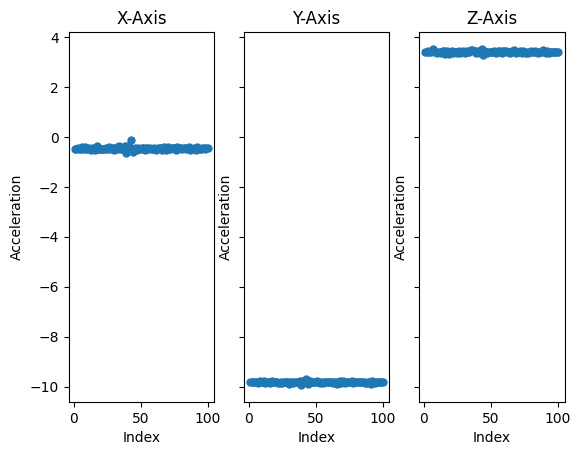

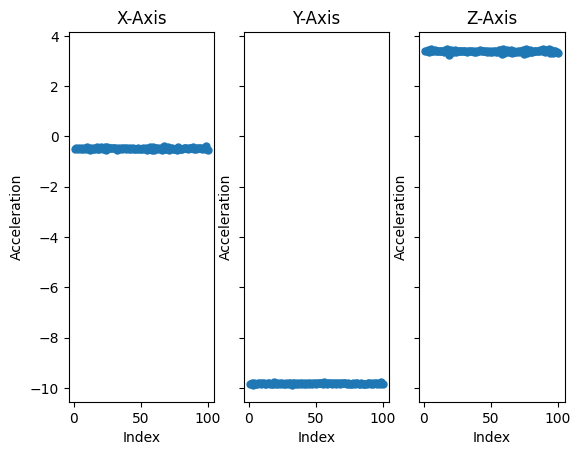

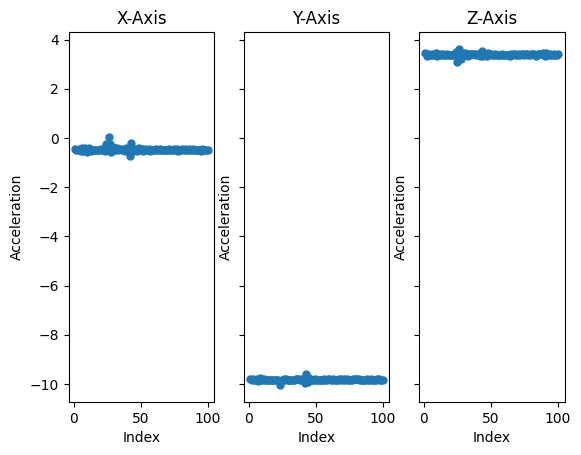

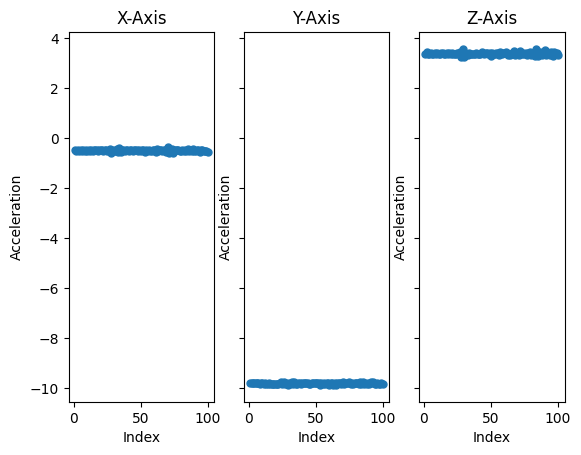

In [14]:
# Create the GUI window
window = tk.Tk()
window.title("MPU6050 - Leitura de dados")

# Initialize variables for checkbox states
show_x = tk.BooleanVar()
show_y = tk.BooleanVar()
show_z = tk.BooleanVar()

# Create a label for serial port selection
serial_label = tk.Label(window, text="Selecionar porta Serial:")
serial_label.pack()

# Get the available serial ports
available_ports = serial.tools.list_ports.comports()
port_list = [port.device for port in available_ports]

# Create a combo box for serial port selection
serial_port_combo = ttk.Combobox(window, values=port_list)
serial_port_combo.pack()

# Create a button widget
button = tk.Button(window, text="Start", command=button_click)
button.pack()

# Create a progress bar widget
pbar = ttk.Progressbar(window, orient=tk.HORIZONTAL, length=200, mode='determinate')
pbar.pack()

# Start the GUI event loop
window.mainloop()